# Polar Python Chart
### Following tutorial by Yan Holtz with custom legend and color scheme in matplotlib.

Import libraries & Set Up Data

In [ ]:
##Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [62]:
##Import Data
#data source initially compiled from statista data available, followed by some other sources looking online, mainly one provided by the Spanish government
statista_data = [['United States', 8.08, 'North America', 41.76],['Brazil', 5.24, 'South America', 0.46],
        ['France',3.34, 'Western Europe', 0.27 ], ['United Kingdom',2.03, 'Western Europe', 0.13],
        ['Italy',0.9,'Western Europe',3.83],['Germany',0.82, 'Western Europe',2.1],
        ['Ivory Coast', 0.57, 'West Africa'], ['Benin',0.41,'West Africa'],
        ['Senegal',0.36, 'West Africa',], ['Sweden',0.26, 'Northern Europe', 0.06],
        ['Cameroon',0.19, 'Central Africa', 1.03],['Gabon',0.17,'Central Africa'],['Poland',  0.15, 'Eastern Europe'],
        ['Spain',0.13,'Western Europe',43.27],['Equatorial Guinea', 0.13, 'Central Africa', 1.08]]
df = pd.DataFrame(data = statista_data, columns = ['Country','Students_in_mil','Continent','Natives_in_mil'])
#check data
df.head()

,Country,Students_in_mil,Continent,Natives_in_mil
0,United States,8.08,North America,41.76
1,Brazil,5.24,South America,0.46
2,France,3.34,Western Europe,0.27
3,United Kingdom,2.03,Western Europe,0.13
4,Italy,0.90,Western Europe,3.83


In [63]:
##Fix relevant columns
#create columns that are multiples of millions
df['Students'] = df['Students_in_mil']*1000000
df['Natives'] = df['Natives_in_mil']*1000000
#create continent as categories
df['Continent'] = df['Continent'].astype('category')
df['Cont_code'] = df['Continent'].cat.codes

Create Variables to be Used for Graph

In [67]:
#create angles and lengths that are used for the radial chart
ANGLES = np.linspace(0.05, 2*np.pi - 0.05, len(df), endpoint = False)
LENGTHS = df['Students'].values
MEAN_GAIN = df['Natives'].values
REGION = df['Country'].values
NUMBERS = df['Cont_code'].values

In [116]:
#set colors & formatting
GREY12 = "#1f1f1f"

# Set default font to Bell MT, Bell is the prettiest serif IMO
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
#COLORS = {"North America":"blue", "South America": "lightblue", "Western Europe": "orange", "Northern Europe":"darkorange",
        #  "Eastern Europe": "yellow", "West Africa": "purple", "Central Africa": "maroon"}
#COLORS = ["#749692","#566F6C","#BFBA8B","#80CFA9","#2F3E3D","#038477"]
#EQ&Cameroon, Poland, US, Sweden, Brazil, Ivory Coast/Africa, Europe
COLORS = ['#914F76','#A2B9B6','tan','#4D6A67','#F9A03F','#5B2E48','#2B3B39']
#80CFA9
# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=7)

# Normalizer
norm = mpl.colors.Normalize(vmin= NUMBERS.min(), vmax= NUMBERS.max())
COLORS = cmap(norm(NUMBERS))

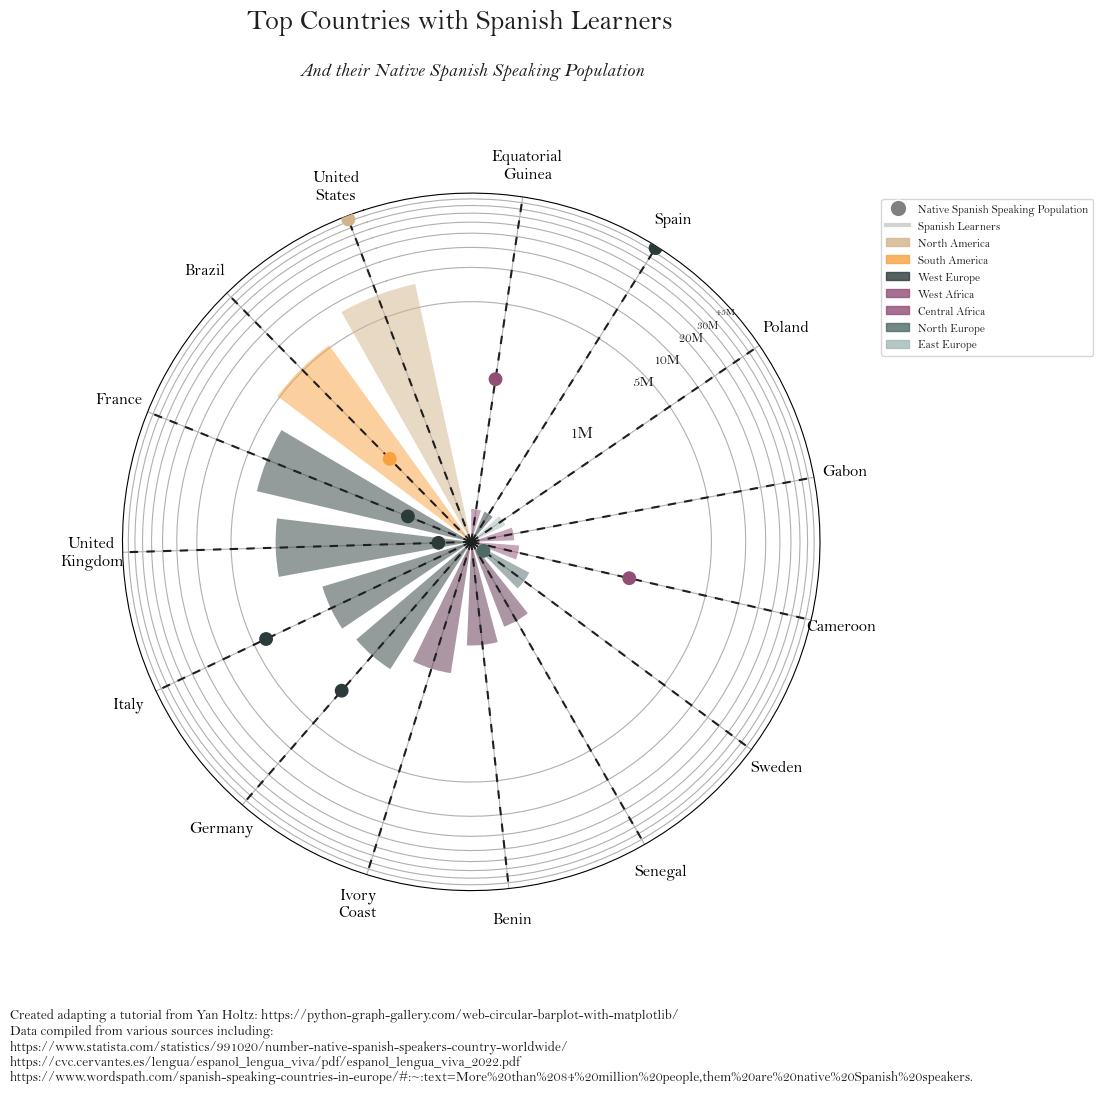

In [179]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 45000000)
ax.set_yscale('symlog', linthresh=500000)

# Add geometries to the plot
# Add bars
ax.bar(ANGLES, LENGTHS, color = COLORS, alpha=0.5, width=0.3, zorder=11, label = 'Spanish Learners')

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 45000000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=80, color= COLORS, zorder=11, label = 'Native Spanish Speakers')


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12)
ax.set_yticks(np.arange(0,45000000,step=5000000))
plt.suptitle('Top Countries with Spanish Learners', size = 20, y = 0.95)
plt.title('And their Native Spanish Speaking Population',style = 'italic', size = 14, pad = 85)

PAD = 10
ax.text(-0.75 * np.pi / 2, 1000000 + PAD, "1M", ha="right", size=12)
ax.text(-0.75 * np.pi / 2, 5000000 + PAD, "5M", ha="right", size=11)
ax.text(-0.75 * np.pi / 2, 10000000 + PAD, "10M", ha="right", size=10)
ax.text(-0.75 * np.pi / 2, 20000000 + PAD, "20M ", ha="right", size=9)
ax.text(-0.75 * np.pi / 2, 30000000 + PAD, "30M ", ha="right", size=8)
ax.text(-0.75 * np.pi / 2, 46000000 + PAD, "45M ", ha="right", size=7)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(12)

ax.set_yticklabels([])

# Make some room for the title and subtitle above.
caption = "\n".join(["Created adapting a tutorial from Yan Holtz: https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/",
                     "Data compiled from various sources including:",
                     "https://www.statista.com/statistics/991020/number-native-spanish-speakers-country-worldwide/",
                     "https://cvc.cervantes.es/lengua/espanol_lengua_viva/pdf/espanol_lengua_viva_2022.pdf",
                     "https://www.wordspath.com/spanish-speaking-countries-in-europe/#:~:text=More%20than%2084%20million%20people,them%20are%20native%20Spanish%20speakers."
])
fig.text(0, 0.1, caption, fontsize=10, ha="left", va="baseline")

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(bottom=0.175)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#add in customized legend to have a mix of both circle and rectangle shapes.
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Native Spanish Speaking Population',
                          markerfacecolor='gray', markersize=12),
                          Line2D([0],[0] ,color = 'lightgray', lw = 3, label = 'Spanish Learners'),
                          mpatches.Patch(color='tan', label='North America', alpha = 0.8),
                          mpatches.Patch(color='#F9A03F', label='South America', alpha = 0.8),
                          mpatches.Patch(color='#2B3B39', label='West Europe', alpha = 0.8),
                          mpatches.Patch(color='#914F76', label='West Africa', alpha = 0.8),
                          mpatches.Patch(color='#914F76', label='Central Africa', alpha = 0.8),
                          mpatches.Patch(color='#4D6A67', label='North Europe', alpha = 0.8),
                          mpatches.Patch(color='#A2B9B6', label='East Europe', alpha = 0.8)]

# manually define a new patch 
#EQ&Cameroon, Poland, US, Sweden, Brazil, Ivory Coast/Africa, Europe

# handles is a list, so append manual patch
handles.append(patch3)
handles.append(patch6) 
handles.append(patch8) 
handles.append(patch5) 
handles.append(patch1) 
handles.append(patch4) 
handles.append(patch2) 

# Create the figure
ax.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.4, 1), fontsize = 'small')

plt.show()